이번 분석보고서는 월마트의 Sales 데이터를 활용하여 연령대별 고객의 특징을 분석하고 그에 따른 프로모션 전략을 기획하는 것을 목표로 한다. 

# Introduction

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [8]:
df = pd.read_csv('c:/githome/hipython_rep/data/walmart.csv')
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [11]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


# 연령대별 고객 수 

연령대별 고객 수:
Age
0-17      218
18-25    1069
26-35    2053
36-45    1167
46-50     531
51-55     481
55+       372
Name: User_ID, dtype: int64


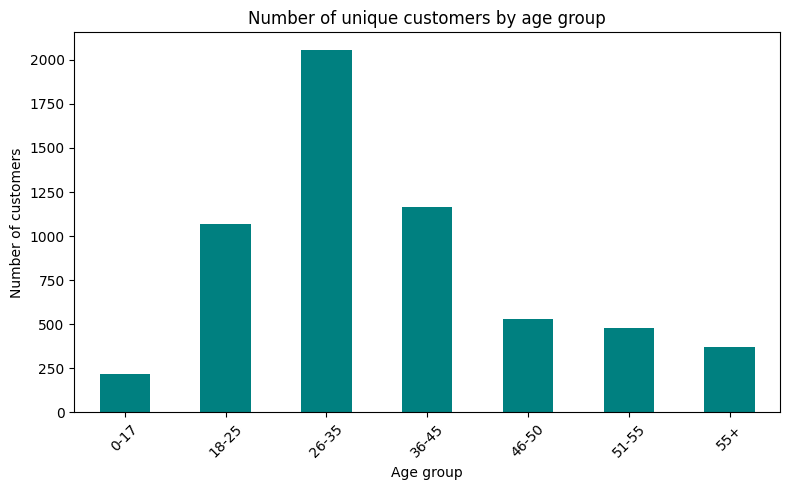

In [ ]:
# 연령대별 고객 수 (User_ID 중복 제거)
age_counts = df.groupby('Age')['User_ID'].nunique() # User_ID 중복 제거 → 고유 고객 수 기준

print("연령대별 고객 수:")
print(age_counts)

# 시각화
plt.figure(figsize=(8, 5))
age_counts.plot(kind='bar', color='teal')
plt.title('Number of unique customers by age group')
plt.ylabel('Number of customers')
plt.xlabel('Age group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

위 그래프는 연령대별 고객 수를 바 그래프로 나타낸 것이다. 26-35세 연령대 고객이 가장 많았으며, 그 뒤를 36-45세와 18-25세 연령대가 이었다.

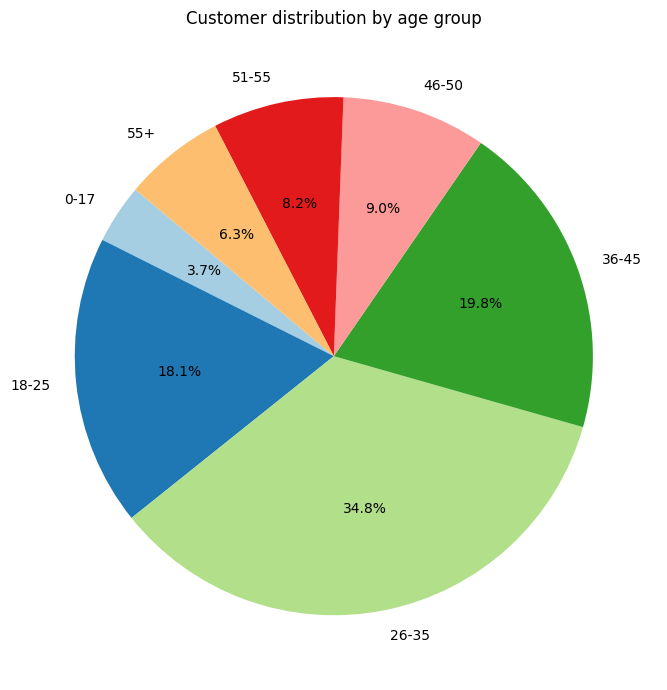

In [25]:
# 연령대별 고유 고객 수 (앞서 구한 age_counts 사용)
age_counts = df.groupby('Age')['User_ID'].nunique()

# 파이차트 시각화
plt.figure(figsize=(7, 7))
plt.pie(
    age_counts,
    labels=age_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors
)
plt.title('Customer distribution by age group')
plt.tight_layout()
plt.show()


파이차트를 통해 고객의 연령대별 비율을 살펴보았다. 파이차트는 바 그래프보다 가장 큰 비율을 차지하는 연령대를 더 쉽고 빠르게 확인할 수 있다는 장점이 있다. 하지만 18-25세와 36-45세처럼 비슷한 비율의 데이터는 % 수치를 보지 않으면 어느 연령대가 더 많은지 직관적으로 구분하기 어렵다는 한계도 있다.

앞서 살펴본 결과, 26-35세 연령대의 비율이 가장 높아 이들의 소비 패턴에 맞춘 프로모션이 필요할 것이라는 생각이 들었다. 하지만 Walmart에게는 고객 유치도 중요하지만, 궁극적으로 더 중요한 가치는 매출이라고 볼 수 있다. 26-35세 고객의 수는 많지만 실제로는 큰 소비를 하지 않을 가능성도 있기 때문에, 연령대별 평균 구매금액을 분석해 이를 확인해보고자 한다.

# 연령대별 평균 구매금액 분석

연령대별 평균 구매금액:
Age
0-17     8933.464640
18-25    9169.663606
26-35    9252.690633
36-45    9331.350695
46-50    9208.625697
51-55    9534.808031
55+      9336.280459
Name: Purchase, dtype: float64


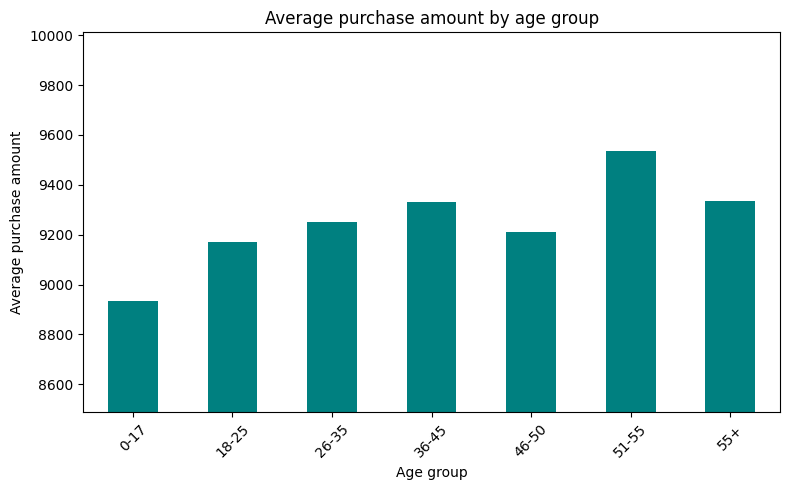

In [26]:
# 연령대별 평균 구매금액 분석
age_purchase = df.groupby('Age')['Purchase'].mean().sort_index()

print("연령대별 평균 구매금액:")
print(age_purchase)

# 시각화
plt.figure(figsize=(8, 5))
ax = age_purchase.plot(kind='bar', color='teal')
plt.title('Average purchase amount by age group')
plt.ylabel('Average purchase amount')
plt.xlabel('Age group')
plt.xticks(rotation=45)

# y축 범위 조정 (구매금액 min/max 기준 살짝 여유)
min_val = age_purchase.min() * 0.95
max_val = age_purchase.max() * 1.05
plt.ylim(min_val, max_val)

plt.tight_layout()
plt.show()

위 그래프는 연령대별 평균 구매금액이다. 51-55세 연령대가 평균적으로 

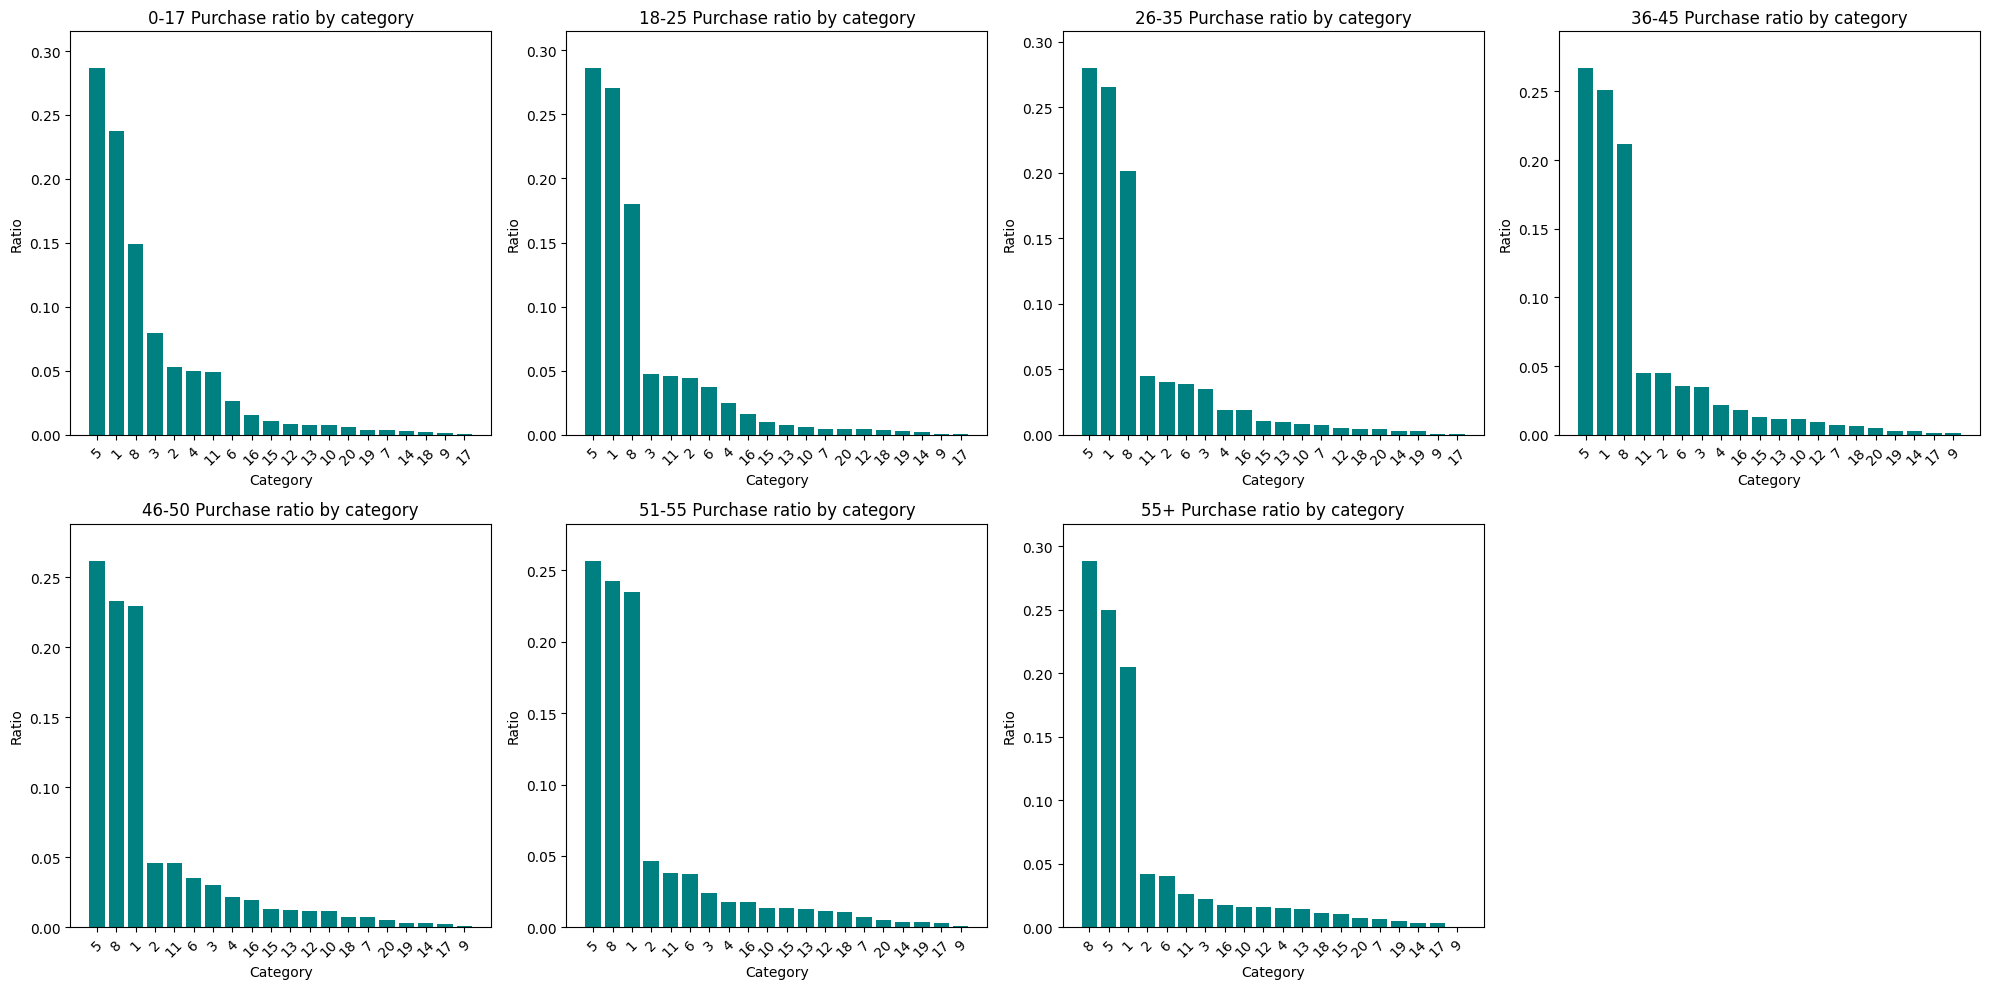

In [27]:
# 연령대 목록
unique_ages = age_category['Age'].unique()

# subplot grid 크기 지정
fig, axes = plt.subplots(2, 4, figsize=(20, 10))  # 2행 4열 (마지막 하나는 비워두기)

# 플랫하게 축 배열
axes = axes.flatten()

for i, target_age in enumerate(unique_ages):
    cat_data = age_category[age_category['Age'] == target_age].sort_values('Ratio', ascending=False)
    
    axes[i].bar(cat_data['Product_Category'].astype(str), cat_data['Ratio'], color='teal')
    axes[i].set_title(f'{target_age} Purchase ratio by category')
    axes[i].set_ylabel('Ratio')
    axes[i].set_xlabel('Category')
    
    # x축 tick 라벨 회전
    axes[i].tick_params(axis='x', rotation=45)
    
    axes[i].set_ylim(0, cat_data['Ratio'].max() * 1.1)

# 마지막 비어있는 plot 제거 (7개 연령대면 8번째는 없음)
if len(unique_ages) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()
